In [644]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# Load the Titanic dataset and show the first 5 rows

#Change the path accordingly
dataset=pd.read_csv('/Users/macbook/Downloads/Machine_Learning/ML_project/spaceship_titanic_e.csv')
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,GroupId,PassengerIdInGroup,MembersOfGroupById,Surname,MembersOfFamilyBySurname,CabinDeck,CabinNum,CabinSide,AgeBinned
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,False,1,1,1.0,Ofracculy,1.0,B,0,P,Senior
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,2,1,1.0,Vines,4.0,F,0,S,Young
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,False,3,1,2.0,Susent,6.0,A,0,S,Senior
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,False,3,2,2.0,Susent,6.0,A,0,S,Senior
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,True,4,1,1.0,Santantines,6.0,F,1,S,Teenager


Text(0, 0.5, 'No of Passengers')

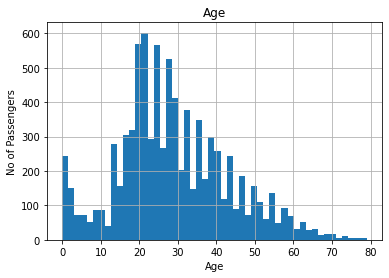

In [645]:
figure=dataset.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passengers')

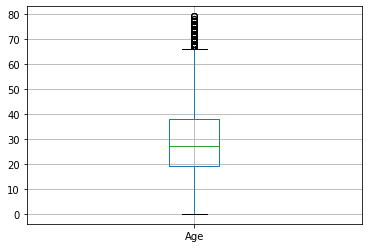

In [646]:
figure=dataset.boxplot(column='Age')

In [647]:
upper_boundary=dataset['Age'].mean()+5*dataset['Age'].std()
lower_boundary=dataset['Age'].mean()-5*dataset['Age'].std()
print(lower_boundary),print(upper_boundary)
dataset['Age'].describe()

-43.617176652078285
101.27303758700899


count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [648]:
#First of all we must tend to nans and outliers. For each numerical column we must see if there are any obvious outliers. The general rule might be if the value is out of the borders
#[mean - 5std, mean + 5std] it can be an outlier.


#We input the outliers boundary (upper_boundary) values
#The age is not outlier.

###dataset.loc[dataset['Age']>=72,'Age']=72


In [649]:
dataset['Age'].describe()



count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

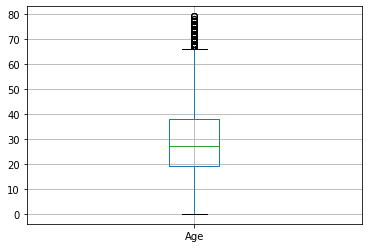

In [650]:

figure=dataset.boxplot(column='Age')

In [651]:
dataset['Age'].isnull().sum()

179

In [652]:
#Fill the missing 179 values for Age with Mean

# Impute missing values with the mean for Column Age.
mean_value = dataset['Age'].mean()
rounded_mean = round(mean_value, 0)
print(rounded_mean)

dataset['Age'].fillna(rounded_mean, inplace=True)

dataset['Age'].describe()



29.0


count    8693.000000
mean       28.831474
std        14.339075
min         0.000000
25%        20.000000
50%        27.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

In [653]:
##now shows no missing values.
dataset['Age'].isnull().sum()



0

Text(0, 0.5, 'RoomService to Passengers')

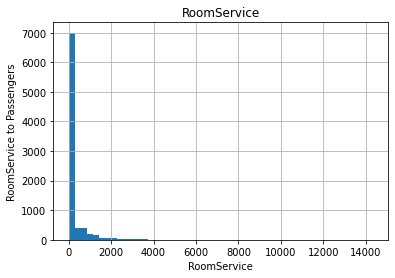

In [654]:
figure=dataset.RoomService.hist(bins=50)
figure.set_title('RoomService')
figure.set_xlabel('RoomService')
figure.set_ylabel('RoomService to Passengers')




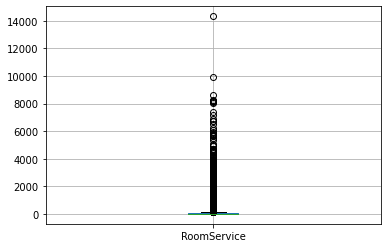

In [655]:
figure=dataset.boxplot(column='RoomService')



In [656]:
dataset['RoomService'].describe()

count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64

In [657]:
#Check the max value in RoomService

condition = dataset['RoomService'] >=14327.0
dataset_filtered = dataset[condition]

##The room is number is Unknown
dataset_filtered  




,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,GroupId,PassengerIdInGroup,MembersOfGroupById,Surname,MembersOfFamilyBySurname,CabinDeck,CabinNum,CabinSide,AgeBinned
4416,4690_02,Europa,False,NaN,TRAPPIST-1e,27.0,False,14327.0,1487.0,0.0,...,False,4690,2,2.0,Dishocatal,5.0,Unknown,Unknown,Unknown,Young


In [658]:
# Drop rows where RoomService is greater than 14327.0

condition_drop = dataset['RoomService'] >= 14327.0
df_01 = dataset.drop(dataset[condition].index)



In [659]:
#Check if row has been droped 

condition = df_01['RoomService'] >=14327.0
dataset_filtered = df_01[condition]


dataset_filtered  

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,GroupId,PassengerIdInGroup,MembersOfGroupById,Surname,MembersOfFamilyBySurname,CabinDeck,CabinNum,CabinSide,AgeBinned


In [660]:
df_01['RoomService'].describe()

count    8511.000000
mean      223.030666
std       648.993328
min         0.000000
25%         0.000000
50%         0.000000
75%        46.500000
max      9920.000000
Name: RoomService, dtype: float64

In [661]:
# Impute missing values with the mean for Column RoomService.

mean_value = df_01['RoomService'].mean()
rounded_mean = round(mean_value, 0)
print(rounded_mean)
df_01['RoomService'].fillna(rounded_mean, inplace=True)

df_01['RoomService'].describe()




223.0


count    8692.000000
mean      223.030028
std       642.199757
min         0.000000
25%         0.000000
50%         0.000000
75%        78.000000
max      9920.000000
Name: RoomService, dtype: float64

In [662]:
#Check the empty values for RoomService
df_01['RoomService'].isnull().sum()

0

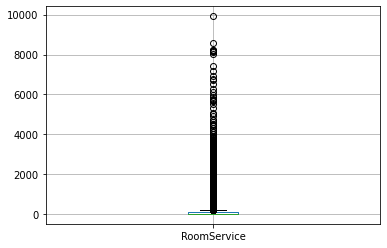

In [663]:
figure=df_01.boxplot(column='RoomService')

Text(0, 0.5, 'passenger has billed')

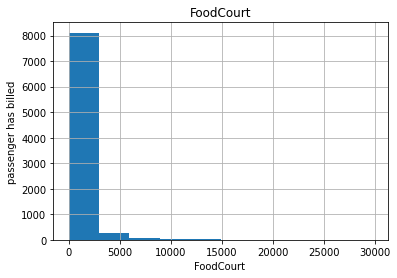

In [664]:
figure=df_01.FoodCourt .hist(bins=10)
figure.set_title('FoodCourt')
figure.set_xlabel('FoodCourt ')
figure.set_ylabel('passenger has billed')

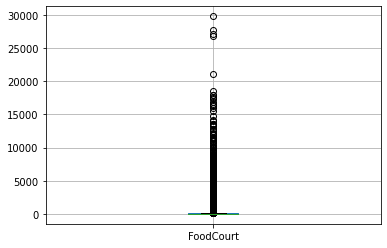

In [665]:
figure=df_01.boxplot(column='FoodCourt')

In [666]:
df_01['FoodCourt'].describe()

count     8509.000000
mean       457.956282
std       1611.545331
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64

In [667]:
upper_boundary=df_01['FoodCourt'].mean()+5*df_01['FoodCourt'].std()
lower_boundary=df_01['FoodCourt'].mean()-5*df_01['FoodCourt'].std()
print(lower_boundary),print(upper_boundary)

-7599.770372873823
8515.682936042233


(None, None)

In [668]:
#We input the outliers boundary (upper_boundary) values

df_01.loc[df_01['FoodCourt']>=8515,'FoodCourt']=8515

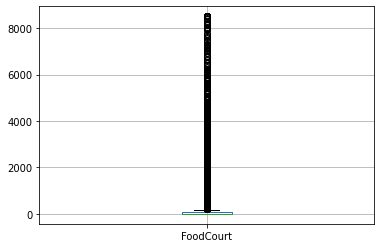

In [669]:
figure=df_01.boxplot(column='FoodCourt')

In [670]:
df_01['FoodCourt'].isnull().sum()

183

In [671]:
#Fill the missing values for FoodCourt

# Impute missing values with the mean for Column FoodCourt.
mean_value = df_01['FoodCourt'].mean()
rounded_mean = round(mean_value, 0)
print(rounded_mean)
df_01['FoodCourt'].fillna(rounded_mean, inplace=True)

df_01['FoodCourt'].describe()

420.0


count    8692.000000
mean      419.668086
std      1260.808800
min         0.000000
25%         0.000000
50%         0.000000
75%       117.250000
max      8515.000000
Name: FoodCourt, dtype: float64

In [672]:
df_01['FoodCourt'].isnull().sum()

0

Text(0, 0.5, 'passenger has billed ShoppingMall')

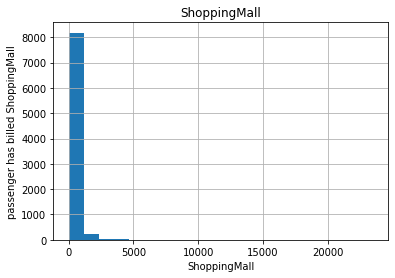

In [673]:
figure=df_01.ShoppingMall.hist(bins=20)
figure.set_title('ShoppingMall')
figure.set_xlabel('ShoppingMall')
figure.set_ylabel('passenger has billed ShoppingMall')

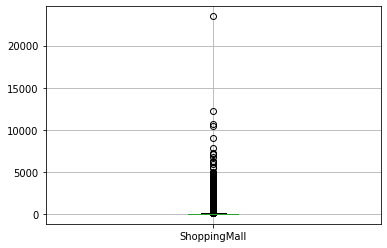

In [674]:
figure=df_01.boxplot(column='ShoppingMall')

In [675]:
df_01['ShoppingMall'].describe()

count     8484.000000
mean       173.749646
std        604.729157
min          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
max      23492.000000
Name: ShoppingMall, dtype: float64

In [676]:
#Check the max value in ShoppingMall

condition = df_01['ShoppingMall'] >=23492.0
dataset_filtered = df_01[condition]

##The room is number is Unknown
dataset_filtered  


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,GroupId,PassengerIdInGroup,MembersOfGroupById,Surname,MembersOfFamilyBySurname,CabinDeck,CabinNum,CabinSide,AgeBinned
8415,8989_01,Europa,False,B/291/P,TRAPPIST-1e,17.0,False,0.0,366.0,23492.0,...,True,8989,1,4.0,Unknown,NaN,B,291,P,Teenager


In [677]:
# Drop rows where ShoppingMall is greater than 23492.0

condition_drop = df_01['ShoppingMall'] >= 23492.0
df_02 = df_01.drop(df_01[condition].index)

In [678]:
#Check the max value in ShoppingMall was droped

condition = df_02['ShoppingMall'] >=23492.0
dataset_filtered = df_02[condition]

##The room is number is Unknown
dataset_filtered  

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,GroupId,PassengerIdInGroup,MembersOfGroupById,Surname,MembersOfFamilyBySurname,CabinDeck,CabinNum,CabinSide,AgeBinned


In [679]:
df_02['ShoppingMall'].describe()

count     8483.000000
mean       171.000825
std        549.206385
min          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
max      12253.000000
Name: ShoppingMall, dtype: float64

In [680]:
df_02['ShoppingMall'].isnull().sum()

208

In [681]:
#Fill the missing values for ShoppingMall

# Impute missing values with the mean for Column ShoppingMall.
mean_value = df_02['ShoppingMall'].mean()
rounded_mean = round(mean_value, 0)
print(rounded_mean)
df_02['ShoppingMall'].fillna(rounded_mean, inplace=True)

df_02['ShoppingMall'].describe()

171.0


count     8691.000000
mean       171.000805
std        542.593795
min          0.000000
25%          0.000000
50%          0.000000
75%         45.000000
max      12253.000000
Name: ShoppingMall, dtype: float64

In [682]:
df_02['ShoppingMall'].isnull().sum()

0

In [683]:
upper_boundary=df_02['Spa'].mean()+5*df_02['Spa'].std()
lower_boundary=df_02['Spa'].mean()-5*df_02['Spa'].std()
print(lower_boundary),print(upper_boundary)

#The Spa. seens not to be an outlier 
df_02['Spa'].describe()

-5373.000390571986
5995.340305945752


count     8508.000000
mean       311.169958
std       1136.834070
min          0.000000
25%          0.000000
50%          0.000000
75%         59.000000
max      22408.000000
Name: Spa, dtype: float64

In [684]:
df_02['Spa'].describe()

count     8508.000000
mean       311.169958
std       1136.834070
min          0.000000
25%          0.000000
50%          0.000000
75%         59.000000
max      22408.000000
Name: Spa, dtype: float64

In [685]:
df_02['Spa'].isnull().sum()

183

In [686]:
#Fill the missing values for Spa 

# Impute missing values with the mean for Column Spa.
mean_value = df_02['Spa'].mean()
rounded_mean = round(mean_value, 0)
print(rounded_mean)
df_02['Spa'].fillna(rounded_mean, inplace=True)

df_02['Spa'].describe()

311.0


count     8691.000000
mean       311.166379
std       1124.800262
min          0.000000
25%          0.000000
50%          0.000000
75%         89.000000
max      22408.000000
Name: Spa, dtype: float64

In [687]:
df_02['Spa'].isnull().sum()

0

In [688]:

#Check bundaries for VRDeck column 

upper_boundary=df_02['VRDeck'].mean()+5*df_02['VRDeck'].std()
lower_boundary=df_02['VRDeck'].mean()-5*df_02['VRDeck'].std()
print(lower_boundary),print(upper_boundary)

df_02['VRDeck'].describe()

-5424.286310529413
6034.138597957379


count     8503.000000
mean       304.926144
std       1145.842491
min          0.000000
25%          0.000000
50%          0.000000
75%         46.000000
max      24133.000000
Name: VRDeck, dtype: float64

In [689]:
df_02['VRDeck'].isnull().sum()

188

In [690]:
#Fill the missing values for VRDeck 

# Impute missing values with the mean for Column VRDeck.
mean_value = df_02['VRDeck'].mean()
rounded_mean = round(mean_value, 0)
print(rounded_mean)
df_02['VRDeck'].fillna(rounded_mean, inplace=True)

df_02['VRDeck'].describe()

305.0


count     8691.000000
mean       304.927741
std       1133.380106
min          0.000000
25%          0.000000
50%          0.000000
75%         71.000000
max      24133.000000
Name: VRDeck, dtype: float64

In [691]:
df_02['VRDeck'].isnull().sum()

0

In [692]:
#Check empty category and add  a new category 'Unknown'.

df_02['HomePlanet'].isnull().sum()

201

In [693]:
df_02['HomePlanet'].fillna('Unknown', inplace=True)


In [694]:
df_02['HomePlanet'].isnull().sum()

0

In [695]:
df_02['CryoSleep'].isnull().sum()

217

In [696]:
df_02['CryoSleep'].fillna('Unknown', inplace=True)
df_02['CryoSleep'].isnull().sum()

0

In [697]:
df_02['Destination'].isnull().sum()

182

In [698]:
df_02['Destination'].fillna('Unknown', inplace=True)
df_02['Destination'].isnull().sum()

0

In [699]:
df_02['VIP'].isnull().sum()

203

In [700]:
df_02['VIP'].fillna('Unknown', inplace=True)
df_02['VIP'].isnull().sum()

0

In [701]:
df_02['Name'].isnull().sum()

199

In [702]:
df_02['Name'].fillna('Unknown', inplace=True)
df_02['Name'].isnull().sum()






0

In [703]:
##MembersOfFamilyBySurname fill emptys
df_02['MembersOfFamilyBySurname'].isnull().sum()

199

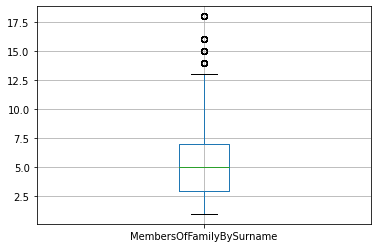

In [704]:

#The outliers look good 
figure=df_02.boxplot(column='MembersOfFamilyBySurname')

In [708]:
##label_encoder = LabelEncoder()

# Apply label encoding to each categorical column bellow
##for column in ['HomePlanet','Destination','CabinSide','AgeBinned']: 
    ##df_02[column] = label_encoder.fit_transform(df_02[column])

# Print the DataFrame with numerical labels
##df_02.head(150)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,GroupId,PassengerIdInGroup,MembersOfGroupById,Surname,MembersOfFamilyBySurname,CabinDeck,CabinNum,CabinSide,AgeBinned
0,0001_01,1,False,B/0/P,2,39.0,False,0.0,0.0,0.0,...,0,1,1,1.0,Ofracculy,1.0,B,0,0,2
1,0002_01,0,False,F/0/S,2,24.0,False,109.0,9.0,25.0,...,1,2,1,1.0,Vines,4.0,F,0,1,4
2,0003_01,1,False,A/0/S,2,58.0,True,43.0,3576.0,0.0,...,0,3,1,2.0,Susent,6.0,A,0,1,2
3,0003_02,1,False,A/0/S,2,33.0,False,0.0,1283.0,371.0,...,0,3,2,2.0,Susent,6.0,A,0,1,2
4,0004_01,0,False,F/1/S,2,16.0,False,303.0,70.0,151.0,...,1,4,1,1.0,Santantines,6.0,F,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0165_01,2,True,F/37/P,2,35.0,Unknown,0.0,0.0,0.0,...,1,165,1,1.0,Anche,2.0,F,37,0,2
146,0167_01,2,True,F/35/S,2,13.0,False,0.0,0.0,0.0,...,1,167,1,2.0,Floaf,4.0,F,35,1,3
147,0167_02,2,False,F/35/S,2,27.0,False,1365.0,0.0,48.0,...,0,167,2,2.0,Floaf,4.0,F,35,1,4
148,0169_01,0,True,G/23/P,2,31.0,False,0.0,0.0,0.0,...,0,169,1,1.0,Fisherry,2.0,G,23,0,2


In [718]:

# Perform one-hot encoding for each categorical column  with True and False
dataset_one_hot = pd.get_dummies(df_02, columns=['HomePlanet', 'CabinSide', 'Destination'])



# Print the DataFrame after one-hot encoding
print(dataset_one_hot)

     PassengerId CryoSleep     Cabin   Age    VIP  RoomService  FoodCourt  \
0        0001_01     False     B/0/P  39.0  False          0.0        0.0   
1        0002_01     False     F/0/S  24.0  False        109.0        9.0   
2        0003_01     False     A/0/S  58.0   True         43.0     3576.0   
3        0003_02     False     A/0/S  33.0  False          0.0     1283.0   
4        0004_01     False     F/1/S  16.0  False        303.0       70.0   
...          ...       ...       ...   ...    ...          ...        ...   
8688     9276_01     False    A/98/P  41.0   True          0.0     6819.0   
8689     9278_01      True  G/1499/S  18.0  False          0.0        0.0   
8690     9279_01     False  G/1500/S  26.0  False          0.0        0.0   
8691     9280_01     False   E/608/S  32.0  False          0.0     1049.0   
8692     9280_02     False   E/608/S  44.0  False        126.0     4688.0   

      ShoppingMall     Spa  VRDeck  ... HomePlanet_1  HomePlanet_2  \
0    

In [720]:
##Drop one category column for each encoded HomePlanet_0, CabinSide_0, Destination_0




# Drop the 'HomePlanet_0' , 'CabinSide_0' and 'Destination_0'
columns_to_drop = ['HomePlanet_0', 'CabinSide_0','Destination_0']
df_final = dataset_one_hot.drop(columns=columns_to_drop)


df_final.head()



,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,CabinNum,AgeBinned,HomePlanet_1,HomePlanet_2,HomePlanet_3,CabinSide_1,CabinSide_2,Destination_1,Destination_2,Destination_3
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,...,0,2,True,False,False,False,False,False,True,False
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,...,0,4,False,False,False,True,False,False,True,False
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,0,2,True,False,False,True,False,False,True,False
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,0,2,True,False,False,True,False,False,True,False
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,...,1,3,False,False,False,True,False,False,True,False


In [721]:
#Export DataFrame with modifications to a CSV File
#
df_final.to_csv('/Users/macbook/Downloads/Machine_Learning/ML_project/spaceship_titanic_fe2.csv', index=False)